In [41]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks')

# Load chunck

In [42]:
path = '/datb/16011015/ExoGAN_data//'
filenames = 'chunck_0.pkgz'

X = ke.load_all_to_array(path, filenames)

100%|██████████| 1/1 [00:11<00:00, 11.81s/it]


In [43]:
print('X contains %s dictionaries' % len(X))
X[0].keys()

X contains 100000 dictionaries


dict_keys(['data', 'param'])

In [44]:
X[0]['data'].keys(), X[0]['param'].keys()

(dict_keys(['spectrum']),
 dict_keys(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius', 'h2o_mixratio', 'co2_mixratio', 'co_mixratio']))

# Combine $(R_p/R_s)^2$ with wavelengths

In [45]:
wavelengths = ke.load_wavelengths()

In [46]:
# Calling R/R -> y and wavelengths -> x to keep it short for now

spectrum = X[0]['data']['spectrum']
df = ke.combine_spectrum_with_wavelengths(spectrum, wavelengths)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 2 columns):
y    515 non-null float64
x    515 non-null float64
dtypes: float64(2)
memory usage: 8.1 KB


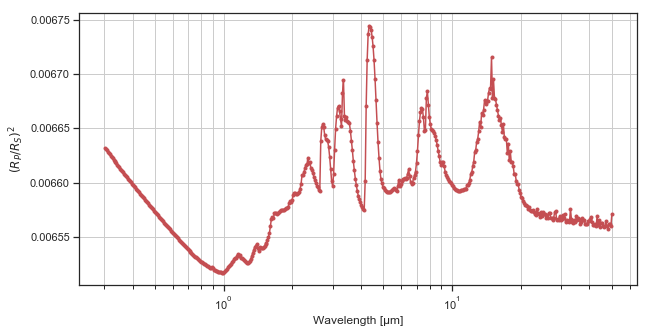

In [47]:
plt = ke.plot_spectrum(df.x, df.y)

plt.savefig('plots/sample_spectrum.png', dpi=1200)

# Plot more spectra

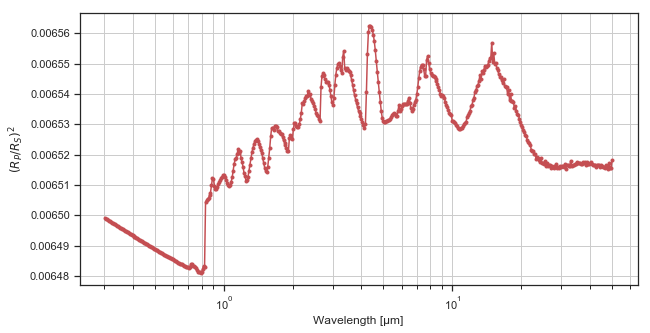

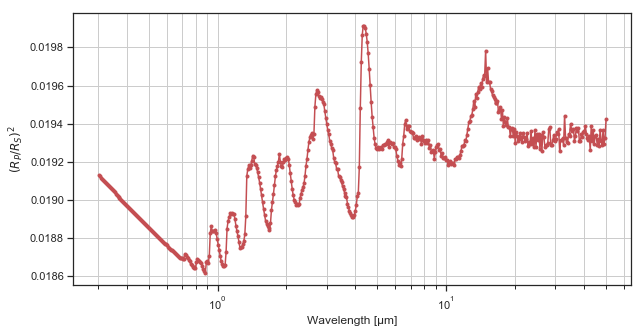

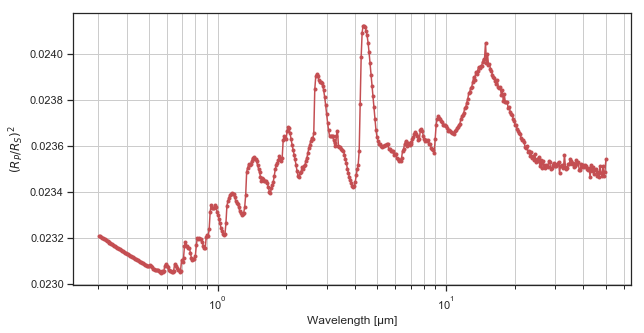

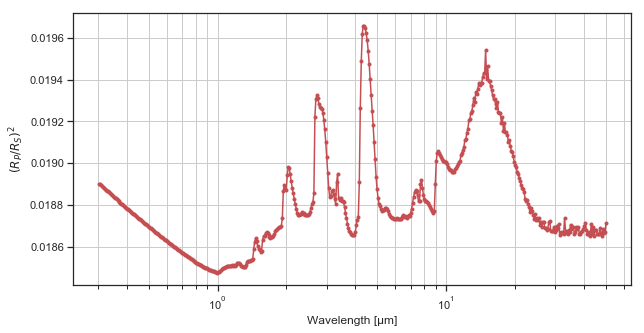

In [48]:
n = 4 # number of spectra to plot

indices = np.random.randint(0, len(X), size=n)

spectra = [X[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths


for i in range(n):
    ke.plot_spectrum(df.x, df[i])

In [49]:
"""
Do the same thing but put it in one figure (with more spectra)
"""

n = 5 # number of spectra to plot

indices = np.random.randint(0, len(X), size=n)

spectra = [X[i]['data']['spectrum'] for i in indices] # load the n randomly selected spectra into an array

df = pd.DataFrame(spectra).T # take the transpose so axis 0 are the R/R values
df['x'] = wavelengths

i=0
y = df[i].values.reshape(-1,1)
y.shape

(515, 1)

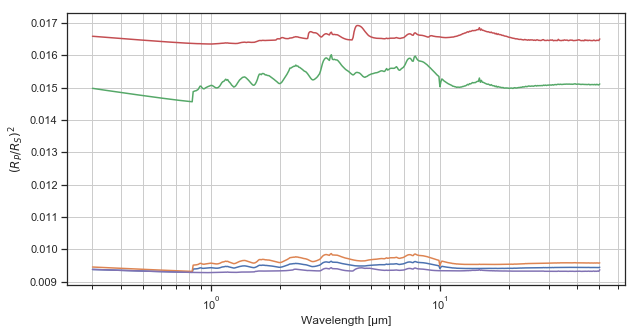

In [50]:
plt.figure(figsize=(10,5))

for i in range(n):
    plt.plot(df.x, df[i])
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'$(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')
    

plt.xscale('log')

(0.3, 1)

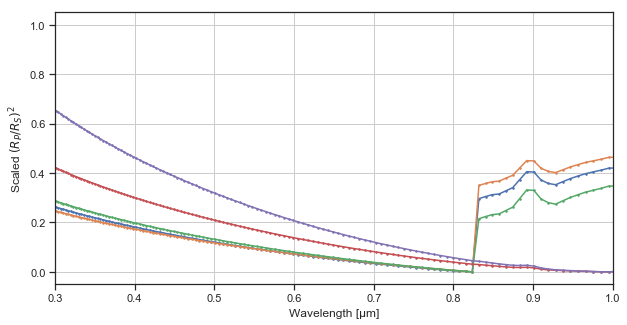

In [51]:
plt.figure(figsize=(10,5))

for i in range(n):
    y = df[i].values.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1)).fit(y)
    y = scaler.transform(y)

    plt.plot(df.x, y, '.-', ms=3)
    
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'Scaled $(R_P / R_S)^2$')

plt.grid(True, which="both", ls='-')


#plt.xscale('log')

plt.xlim((0.3,1))

In [52]:
# Visualizing param ditribution

In [53]:
X[0]['param'].keys()

dict_keys(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius', 'h2o_mixratio', 'co2_mixratio', 'co_mixratio'])

In [54]:
X[0]['param']

{'planet_mass': 2.7837333333333334e+27,
 'temperature_profile': 1888.888888888889,
 'ch4_mixratio': 2.1544346900318865e-06,
 'planet_radius': 55928800.0,
 'h2o_mixratio': 1e-08,
 'co2_mixratio': 2.1544346900318865e-06,
 'co_mixratio': 2.1544346900318865e-06}

In [55]:
pd.DataFrame(X[0]['param'], index=[0])

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
0,2.783733e+27,1888.888889,0.000002,55928800.0,1.000000e-08,0.000002,0.000002


In [56]:
params = [pd.DataFrame(X[i]['param'], index=[0]) for i in tqdm(range(len(X)))]

100%|██████████| 100000/100000 [00:45<00:00, 2178.70it/s]


In [57]:
params = pd.concat(params)
params.head()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
0,2.783733e+27,1888.888889,2.154435e-06,5.592880e+07,1.000000e-08,2.154435e-06,2.154435e-06
0,3.036800e+27,1333.333333,1.291550e-05,8.311641e+07,3.593814e-07,1.000000e-01,5.994843e-08
0,2.277600e+27,1777.777778,1.291550e-05,8.311641e+07,1.291550e-05,5.994843e-08,1.000000e-01
0,3.036800e+27,1666.666667,1.291550e-05,8.311641e+07,7.742637e-05,2.154435e-06,4.641589e-04
0,2.277600e+27,2000.000000,3.593814e-07,6.136632e+07,5.994843e-08,1.000000e-01,3.593814e-07


In [58]:
params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 0
Data columns (total 7 columns):
planet_mass            100000 non-null float64
temperature_profile    100000 non-null float64
ch4_mixratio           100000 non-null float64
planet_radius          100000 non-null float64
h2o_mixratio           100000 non-null float64
co2_mixratio           100000 non-null float64
co_mixratio            100000 non-null float64
dtypes: float64(7)
memory usage: 6.1 MB


In [59]:
params.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,2.657116e+27,1499.253333,1.203316e-02,8.042250e+07,1.203310e-02,1.200386e-02,1.197042e-02
std,7.275005e+26,319.119106,2.977971e-02,1.564301e+07,2.978020e-02,2.973343e-02,2.973189e-02
min,1.518400e+27,1000.000000,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.024533e+27,1222.222222,3.593814e-07,6.680384e+07,3.593814e-07,3.593814e-07,3.593814e-07
50%,2.783733e+27,1555.555556,7.742637e-05,7.767889e+07,1.291550e-05,7.742637e-05,1.291550e-05
75%,3.289867e+27,1777.777778,2.782559e-03,9.399146e+07,2.782559e-03,2.782559e-03,2.782559e-03
max,3.796000e+27,2000.000000,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01


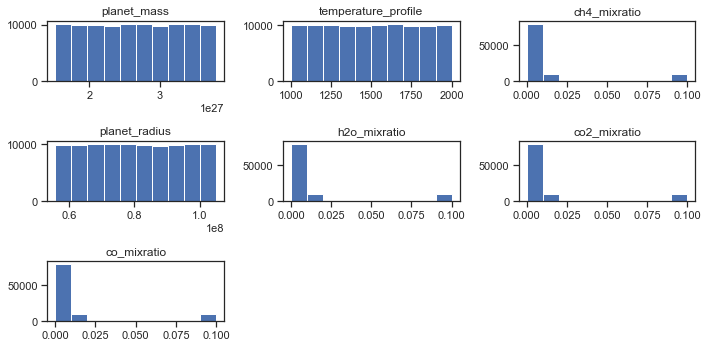

In [60]:
plt.figure(figsize=(10,5))

for i, param in enumerate(params.columns):
    plt.subplot(3,3,i+1)
    plt.title(param)
    plt.hist(params[param], bins=10)

plt.tight_layout()

# Convert params to logarithmic scale

(array([10167.,  9917., 10014.,  9931.,  9963.,  9875., 10132.,  9956.,
        10051.,  9994.]),
 array([-18.42068074, -16.80887118, -15.19706161, -13.58525205,
        -11.97344248, -10.36163292,  -8.74982335,  -7.13801379,
         -5.52620422,  -3.91439466,  -2.30258509]),
 <a list of 10 Patch objects>)

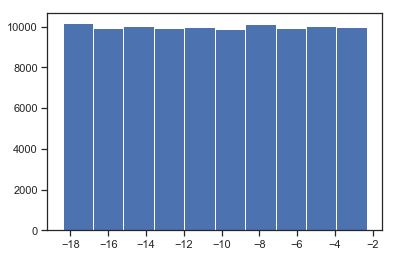

In [61]:
t = np.log(params['co2_mixratio'])

plt.hist(t)

In [62]:
for param in params:
    params[param] = np.log(params[param])

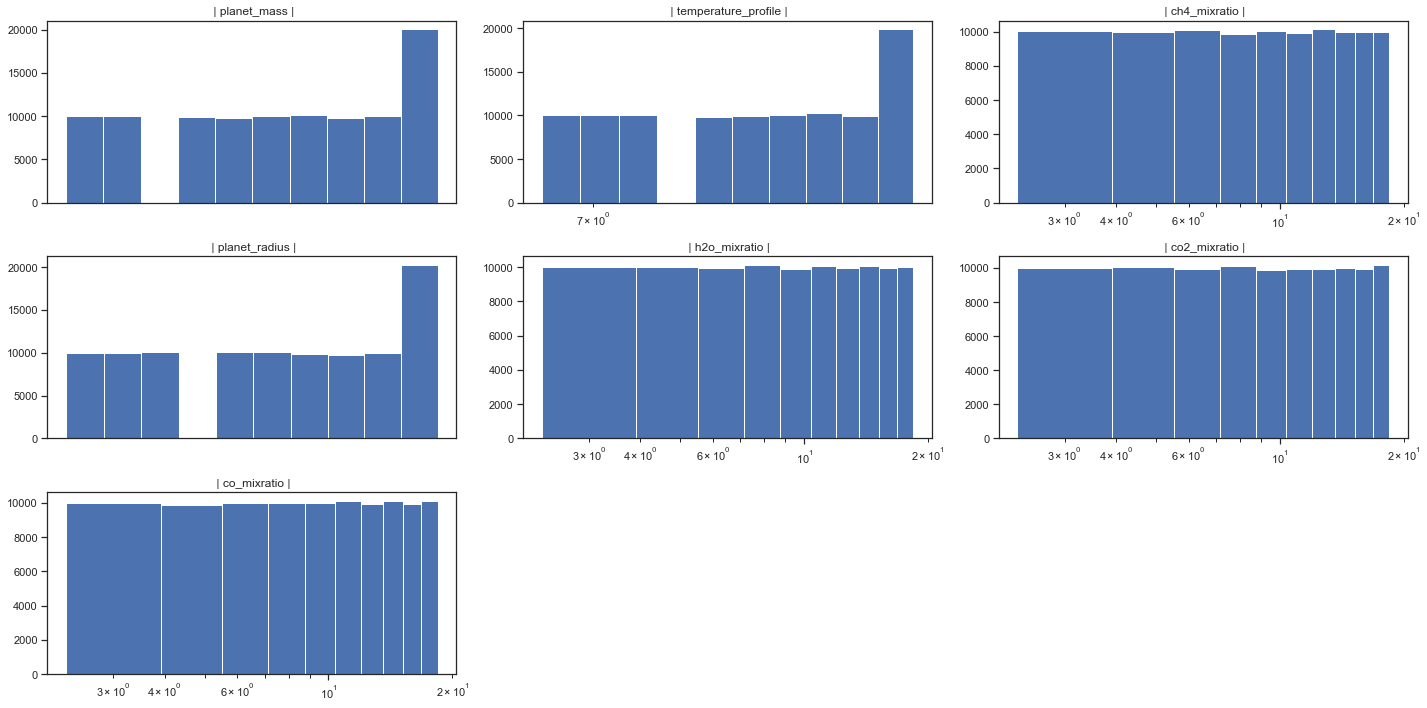

In [63]:
plt.figure(figsize=(20,10))

for i, param in enumerate(params.columns):
    plt.subplot(3,3,i+1)
    plt.title(r' | %s |' % param)
    plt.hist(np.abs(params[param]), bins=10)
    plt.xscale('log')

plt.tight_layout()

## Conclusion
Transform mixratio's with log, keep other params as they are.

In [64]:
params.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,63.106753,7.289094,-10.355598,18.183223,-10.357657,-10.365161,-10.378199
std,0.289674,0.219962,5.143266,0.199809,5.145905,5.152658,5.143374
min,62.587455,6.907755,-18.420681,17.839590,-18.420681,-18.420681,-18.420681
25%,62.875137,7.108426,-14.838882,18.017271,-14.838882,-14.838882,-14.838882
50%,63.193590,7.349588,-9.466183,18.168094,-11.257083,-9.466183,-11.257083
75%,63.360645,7.483119,-5.884384,18.358714,-5.884384,-5.884384,-5.884384
max,63.503745,7.600902,-2.302585,18.468199,-2.302585,-2.302585,-2.302585
